In [2]:
import pandas as pd
import matplotlib # import for plots
import matplotlib.pyplot as plt # import for plots
import numpy as np
from scipy.signal import savgol_filter
import os

ktbl_1=pd.read_csv("../data/raw/ktbl_1.csv")
ktbl_2=pd.read_csv("../data/raw/ktbl_2.csv")
ktbl_3=pd.read_csv("../data/raw/ktbl_3.csv")
ktbl_4=pd.read_csv("../data/raw/ktbl_4.csv")
ktbl_5=pd.read_csv("../data/raw/ktbl_5.csv")
ktbl_6=pd.read_csv("../data/raw/ktbl_6.csv")
ktbl_7=pd.read_csv("../data/raw/ktbl_7.csv")
ktbl_8=pd.read_csv("../data/raw/ktbl_8.csv")
ktbl_9=pd.read_csv("../data/raw/ktbl_9.csv")
ktbl_10=pd.read_csv("../data/raw/ktbl_10.csv")
ktbl_11=pd.read_csv("../data/raw/ktbl_11.csv")
ktbl_12=pd.read_csv("../data/raw/ktbl_12.csv")
ktbl_13=pd.read_csv("../data/raw/ktbl_13.csv")
ktbl_14=pd.read_csv("../data/raw/ktbl_14.csv")
ktbl_15=pd.read_csv("../data/raw/ktbl_15.csv")

ktbl_20=pd.read_csv("../data/raw/swing_ble_1.csv")
ktbl_21=pd.read_csv("../data/raw/jerk_ble_1.csv")
ktbl_22=pd.read_csv("../data/raw/snatch_ble_1.csv")

input_df_list=[ktbl_1,ktbl_2,ktbl_3, ktbl_4,ktbl_5, ktbl_6, ktbl_7, ktbl_8, ktbl_9, ktbl_10, ktbl_11, ktbl_12, ktbl_13, ktbl_14, ktbl_15]
ble_ktbl_list=[ktbl_20,ktbl_21, ktbl_22]

def BLE_ktbl(df):
    df['TgF']=(df['gFx']*df['gFx']+df['gFy']*df['gFy']+df['gFz']*df['gFz'])**0.5
    return df

# future ETL process - read data, read labels, filter, interpolate
# future motion classes - get means
# future distance - between 

# function change all dataframes to relative time
def ETL_ktbl(df):
    df['rel_t']=df['time']-df['time'][0]
    return df
# run the faunction on all dataframes
for any_df in input_df_list:
    any_df=ETL_ktbl(any_df)
"""    
for any_df in ble_ktbl_list:
    any_df=ETL_ktbl(any_df)
    any_df=BLE_ktbl(any_df)
    any_df[['gFx','gFy']]=any_df[['gFy','gFx']]
"""    
print(input_df_list[6].head())
#print(ble_ktbl_list[0].head())

       time     gFx     gFy     gFz    TgF     rel_t
0  0.003422  0.0083  0.9747 -0.1065  0.981  0.000000
1  0.004259  0.0090  0.9732 -0.1043  0.979  0.000837
2  0.004901  0.0098  0.9719 -0.1016  0.977  0.001479
3  0.005495  0.0095  0.9695 -0.0987  0.975  0.002073
4  0.006226  0.0098  0.9705 -0.0957  0.975  0.002804


<IPython.core.display.Javascript object>


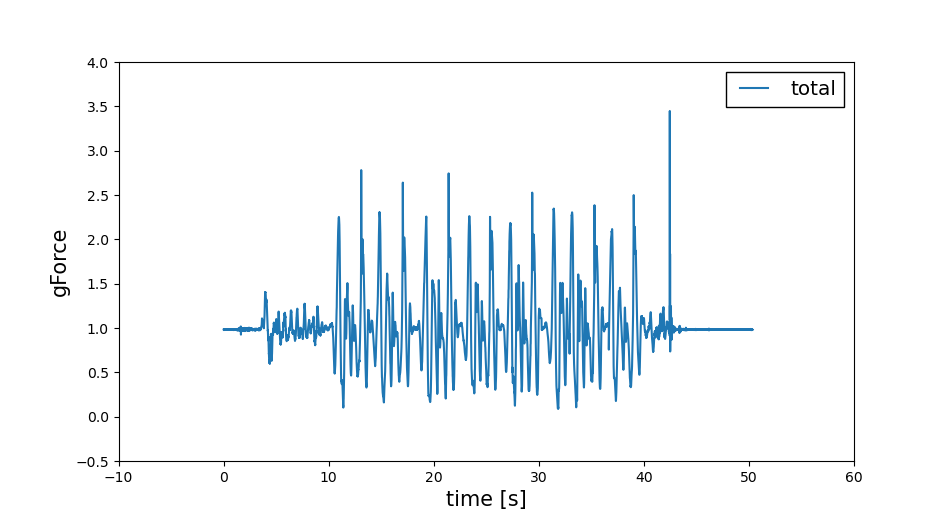

In [3]:
%matplotlib notebook
# explore data to manually label features

plot_df=ktbl_15
plot_data=plot_df[(plot_df['rel_t']>0)  & (plot_df['rel_t']< 78) ]
#plot_data=ktbl_1
plt.plot(plot_data['rel_t'],plot_data['TgF'], label='total')
#plt.plot(plot_data['rel_t'],plot_data['gFx'], label='gFx')                                      
#plt.plot(plot_data['rel_t'],plot_data['gFy'], label='gFy')
#plt.plot(plot_data['rel_t'],plot_data['gFz'], label='gFz')
                                      
plt.xlabel('time [s]', fontsize=15)
plt.ylabel('gForce', fontsize=15)
plt.style.use('classic')
#plt.yscale("log")
plt.legend(loc='upper right')
plt.show()

observed features for differentiation
1. Short cycle jerk - total close to z, shot to 2g, free flight to zero, second bump when standing up,  stop at g~ 1
2. Press - total close to z, spikes are thinner, single spike, total does not go too close to zero (free fall)
3. Swing - total close to y, double spike, 2.5-3.5 g, total goes to zero at max point
4. Snatch - total close to y at peaks, peaks are 3-4g, negative z peaks on returns

in general gFx is useless, look at total, z and y.

In [3]:
# create lists with feature labels
ktbl_1_jerk=[23.10, 25.06, 26.6, 28.6, 30.15, 32.24, 33.93, 35.90, 37.46, 40.38]
ktbl_1_jerk_labels=['jerk' for i in ktbl_1_jerk]
ktbl_1_swing=[59.66, 61.52, 63.34, 65.25, 67.07, 69.03, 70.90, 72.71, 74.63, 76.49]
ktbl_1_swing_labels=['swing' for i in ktbl_1_swing]
ktbl_1_label_times=ktbl_1_jerk+ktbl_1_swing
ktbl_1_labels=ktbl_1_jerk_labels+ktbl_1_swing_labels
ktbl_1_df=pd.DataFrame(list(zip(ktbl_1_label_times, ktbl_1_labels)),columns =['time', 'label'])
ktbl_1_df.to_csv('ktbl\ktbl_1.lbl', index=False)

def create_lbl_list(feature_positions, label):
    label_list=[label for i in feature_positions]
    return label_list


def create_lbl_file(feature_positions, label_list, name):
    label_df=pd.DataFrame(list(zip(feature_positions, label_list)),columns =['time', 'label'])
    name_to_write='ktbl'+'\\'+name+'.lbl'
    if os.path.isfile(name_to_write):
        label_df.to_csv(name_to_write, index=False, mode='a', header=None)
    else: label_df.to_csv(name_to_write, index=False)
    
def process_entry(entry):
    string_buffer=entry.split('_')
    general_name=string_buffer[0]+'_'+string_buffer[1]
    label_type=string_buffer[-1]
    label_list=create_lbl_list(feature_dict[entry], label_type)
    create_lbl_file(feature_dict[entry],label_list,general_name)
    return 0
    
feature_dict= ({'ktbl_3_swing':[15.00, 16.85, 18.64, 20.38, 22.13, 23.9, 25.64, 27.47, 29.20, 31.04 ],
                "ktbl_4_swing" :[15.11, 16.90, 18.66, 20.42, 22.1, 23.84, 25.63, 27.34, 29.14, 30.93 ],
               "ktbl_5_snatch" :[11.25, 14.25, 17.26, 20.17, 23.06, 26.16, 29.21, 32.19 ],
               "ktbl_6_snatch" :[10.70, 13.63, 16.39, 19.22, 22.08, 25.0, 27.83, 30.86  ],
               "ktbl_7_snatch" :[ 11.88, 14.70, 17.41, 20.19, 23.11, 25.96, 28.70, 31.68 ],
               "ktbl_8_jerk" :[8.74, 10.83, 12.43, 14.43, 16.24, 18.45, 20.05, 22.09, 25.70, 29.55],
               "ktbl_9_jerk" :[ 13.32, 14.80, 16.87, 18.53, 22.39, 26.03, 28.15 , 29.80, 31.92, 34.64 ],
               "ktbl_10_jerk" :[ 10.31, 13.65, 17.04, 20.48, 24.15, 27.83, 31.55, 34.13 ],
               "ktbl_11_jerk" :[ 20.14, 21.64, 23.59, 25.12, 27.18, 28.78, 30.95, 32.47, 35.97, 37.54],
               "ktbl_12_jerk":[ 10.35, 12.43, 15.99, 19.47, 24.45, 26.45, 29.97, 33.32 ],
               "ktbl_13_jerk" :[11.48,  13.43, 15.01, 16.95, 18.53, 20.62, 24.43, 28.24, 32.01 ],
               "ktbl_14_jerk":[ 9.78, 11.81, 13.46, 15.61, 17.35, 19.49, 23.25, 27.15, 30.96  ],
               "ktbl_15_jerk":[ 11.31, 13.575, 15.22, 17.52, 19.60, 21.88, 23.76, 25.86, 27.65, 29.84, 31.81, 33.50, 37.27],
               'ktbl_3_none':[8.45,33.37, 37.78, 40.50, 42.23],
               'ktbl_4_none':[11.5, 34.8, 38.8, 40.7, 46.1],
               'ktbl_5_none':[9.72, 12.88, 18.87, 21.58, 24.61, 27.57, 30.53],
               'ktbl_6_none':[4.31, 9.20, 12.18, 15.03, 17.81, 20.66, 23.51, 26.29, 29.35],
               'ktbl_7_none':[6.84, 10.62, 13.28, 18.86, 21.58, 27.35, 30.32],
               'ktbl_8_none':[4.72, 6.30, 15.06, 22.57, 26.22, 34.56, 36.29],
               'ktbl_9_none':[6.84, 8.33, 9.55, 32.88],
               'ktbl_1_none':[2.0, 6.3, 7.6, 10.0, 18.7, 20.4, 21.5, 42.8],
               'ktbl_10_none':[5.18, 6.52, 10.61, 13.96, 17.38, 24.56, 28.18, 36.83],
               'ktbl_3_noswing':[15.94, 17.76, 19.51, 21.30, 23.06, 24.81, 26.60, 28.39, 30.18],
               'ktbl_4_noswing':[16.06, 17.84, 19.58, 21.29, 23.00, 24.78, 26.52, 30.11],
               'ktbl_1_noswing':[60.60, 62.47, 64.31, 66.19, 68.07, 69.94, 71.88, 73.73, 75.57],
               'ktbl_20_swing':[2.32,4.04, 5.76, 7.51, 9.20, 10.98, 12.73, 14.48, 16.20, 17.95],
               'ktbl_22_snatch':[2.20, 5.26, 7.97, 10.92, 13.66, 16.54]})

for entry in feature_dict.keys():
    process_entry(entry)


ktbl_3_swing=[15.00, 16.85, 18.64, 20.38, 22.13, 23.9, 25.64, 27.47, 29.20, 31.04 ] # included
ktbl_4_swing=[15.11, 16.90, 18.66, 20.42, 22.1, 23.84, 25.63, 27.34, 29.14, 30.93 ] # included
ktbl_5_snatch=[11.25, 14.25, 17.26, 20.17, 23.06, 26.16, 29.21, 32.19 ] # included
ktbl_6_snatch=[10.70, 13.63, 16.39, 19.22, 22.08, 25.0, 27.83, 30.86  ] # included
ktbl_7_snatch=[ 11.88, 14.70, 17.41, 20.19, 23.11, 25.96, 28.70, 31.68 ] # included
ktbl_8_jerk=[8.74, 10.83, 12.43, 14.43, 16.24, 18.45, 20.05, 22.09, 25.70, 29.55]  # included
ktbl_9_jerk=[ 13.32, 14.80, 16.87, 18.53, 22.39, 26.03, 28.15 , 29.80, 31.92, 34.64 ] # included
ktbl_10_jerk=[ 10.31, 13.65, 17.04, 20.48, 24.15, 27.83, 31.55, 34.13 ] # included
ktbl_11_jerk=[ 20.14, 21.64, 23.59, 25.12, 27.18, 28.78, 30.95, 32.47, 35.97, 37.54] # included
ktbl_12_jerk=[ 10.35, 12.43, 15.99, 19.47, 24.45, 26.45, 29.97, 33.32 ] # included
ktbl_13_jerk=[11.48,  13.43, 15.01, 16.95, 18.53, 20.62, 24.43, 28.24, 32.01 ] # included
ktbl_14_jerk=[ 9.78, 11.81, 13.46, 15.61, 17.35, 19.49, 23.25, 27.15, 30.96  ] # included
ktbl_15_jerk=[ 11.31, 13.575, 15.22, 17.52, 19.60, 21.88, 23.76, 25.86, 27.65, 29.84, 31.81, 33.50, 37.27  ]


print(ktbl_1_labels)

span=1.6 # s

# generate empty lists of dataframes for individual labeled segments
df1_list=[]
df2_list=[]
df3_list=[]
df4_list=[]
df5_list=[]
df6_list=[]
df7_list=[]
df8_list=[]
df9_list=[]
df10_list=[]
df11_list=[]
df12_list=[]
df13_list=[]
df14_list=[]
df15_list=[]
df20_list=[]
df22_list=[]

# cut a dataframe segment of a certain span around a feature center
def centroid_to_df(source_df, center, span):
    result_df=source_df[(source_df['rel_t']>(center-span/2)) & (source_df['rel_t']<(center+span/2))].copy()
    return result_df

# convert list of feature locations into list of dataframes with data segments
def centroid_to_df_list(centroids,df_list,source_df,span):
    for centroid in centroids:
        new_df=centroid_to_df(source_df, centroid, span)
        df_list.append(new_df)
    length=[len(x) for x in df_list]
    min_length=min(length)
    for dataframe in df_list:
        dataframe['rel_t']=dataframe['rel_t']-dataframe['rel_t'].values[0]
        dataframe=dataframe[0:min_length]
    return df_list

# apply the list to the data
 
df1_list=centroid_to_df_list(ktbl_1_jerk,df1_list,ktbl_1,span) #jerk
df2_list=centroid_to_df_list(ktbl_1_swing,df2_list,ktbl_1,span) #swing
df3_list=centroid_to_df_list(ktbl_3_swing,df3_list,ktbl_3,span) #swing
df4_list=centroid_to_df_list(ktbl_4_swing,df4_list,ktbl_4,span) #swing
df5_list=centroid_to_df_list(ktbl_5_snatch,df5_list,ktbl_5,span) #snatch
df6_list=centroid_to_df_list(ktbl_6_snatch,df6_list,ktbl_6,span) #snatch
df7_list=centroid_to_df_list(ktbl_7_snatch,df7_list,ktbl_7,span) #snatch
df8_list=centroid_to_df_list(ktbl_8_jerk,df8_list,ktbl_8,span) #jerk
df9_list=centroid_to_df_list(ktbl_9_jerk,df9_list,ktbl_9,span) #jerk
df10_list=centroid_to_df_list(ktbl_10_jerk,df10_list,ktbl_10,span) #jerk
df11_list=centroid_to_df_list(ktbl_11_jerk,df11_list,ktbl_11,span) #jerk
df12_list=centroid_to_df_list(ktbl_12_jerk,df12_list,ktbl_12,span) #jerk
df13_list=centroid_to_df_list(ktbl_13_jerk,df13_list,ktbl_13,span) #jerk
df14_list=centroid_to_df_list(ktbl_14_jerk,df14_list,ktbl_14,span) #jerk
df15_list=centroid_to_df_list(ktbl_15_jerk,df15_list,ktbl_15,span) #jerk


# replace/remove this segment
"""
print(len(df1_list))
print(len(df2_list))
print(len(df3_list))
print(len(df4_list))
print(len(df5_list))
print(len(df6_list))
print(len(df7_list))
print(len(df8_list))
print(len(df9_list))
print(len(df10_list))
print(len(df11_list))
print(len(df12_list))
print(len(df13_list))
print(len(df14_list))
"""

['jerk', 'jerk', 'jerk', 'jerk', 'jerk', 'jerk', 'jerk', 'jerk', 'jerk', 'jerk', 'swing', 'swing', 'swing', 'swing', 'swing', 'swing', 'swing', 'swing', 'swing', 'swing']


'\nprint(len(df1_list))\nprint(len(df2_list))\nprint(len(df3_list))\nprint(len(df4_list))\nprint(len(df5_list))\nprint(len(df6_list))\nprint(len(df7_list))\nprint(len(df8_list))\nprint(len(df9_list))\nprint(len(df10_list))\nprint(len(df11_list))\nprint(len(df12_list))\nprint(len(df13_list))\nprint(len(df14_list))\n'

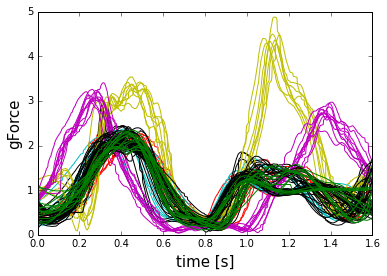

In [4]:
# plot overlayed features and check quality of labeling
i=0
%matplotlib inline


for dataframe in df1_list:
    
    plt.plot(dataframe['rel_t'],dataframe['TgF'], label=i, color='r')
    i=i+1


for dataframe in df8_list:
    plot_values=savgol_filter(dataframe['TgF'].values, 101, 3)
    plt.plot(dataframe['rel_t'],plot_values, label=i, color='c')
    i=i+1
  
for dataframe in df9_list:
    
    plt.plot(dataframe['rel_t'],dataframe['TgF'], label=i, color='k')
    i=i+1

"""
for dataframe in df7_list:
    
    plt.plot(dataframe['rel_t'],dataframe['TgF'], label=i, color='y')
    i=i+1
   
for dataframe in df4_list:
    
    plt.plot(dataframe['rel_t'],dataframe['TgF'], label=i, color='m')
    i=i+1

"""

for dataframe in df10_list:
    plot_values=savgol_filter(dataframe['TgF'].values, 101, 3)
    plt.plot(dataframe['rel_t'],plot_values, label=i, color='k')
    i=i+1
    
for dataframe in df11_list:
    plot_values=savgol_filter(dataframe['TgF'].values, 101, 3)
    plt.plot(dataframe['rel_t'],plot_values, label=i, color='k')
    i=i+1


for dataframe in df12_list:
    plot_values=savgol_filter(dataframe['TgF'].values, 101, 3)
    plt.plot(dataframe['rel_t'],plot_values, color='k' )
    i=i+1

for dataframe in df13_list:
    plot_values=savgol_filter(dataframe['TgF'].values, 101, 3)
    #plot_values=dataframe['TgF'].values
    plt.plot(dataframe['rel_t'],plot_values,  color='g' )
    i=i+1

for dataframe in df14_list:
    plot_values=savgol_filter(dataframe['TgF'].values, 101, 3)
    #plot_values=dataframe['TgF'].values
    plt.plot(dataframe['rel_t'],plot_values,  color='g' )
    i=i+1
    
for dataframe in df15_list:
    plot_values=savgol_filter(dataframe['TgF'].values, 101, 3)
    #plot_values=dataframe['TgF'].values
    plt.plot(dataframe['rel_t'],plot_values,  color='g' )
    i=i+1
         
       
plt.xlabel('time [s]', fontsize=15)
plt.ylabel('gForce', fontsize=15)
plt.style.use('classic')
#plt.yscale("log")
#plt.legend(loc='upper right')
plt.show()

In [6]:
def DTWDistance(s1, s2):
    DTW={}
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

#print(DTWDistance(ts1,ts2))

In [7]:
ts1=df2_list[3]['TgF'].values
ts2=df2_list[6]['TgF'].values
ts3=df2_list[4]['TgF'].values
ts4=df2_list[7]['TgF'].values
print(len(ts1))

#print(DTWDistance(ts1,ts2))
#print(DTWDistance(ts3,ts4))

#print(DTWDistance(ts1,ts3))
#print(DTWDistance(ts1,ts4))

637


In [8]:
%%time

for i in range(100):
    DTWDistance(ts1,ts2)

CPU times: total: 41.3 s
Wall time: 1min 20s


In [10]:
from scipy.signal import savgol_filter
#yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3

y1=df12_list[3]['TgF'].values
y2=df12_list[6]['TgF'].values
x1=df12_list[3]['rel_t'].values
x2=df12_list[6]['rel_t'].values
y3=savgol_filter(y1, 101, 3)
y4=savgol_filter(y2, 101, 3)

xvals = np.linspace(0, span, 50)
yinterp_1 = np.interp(xvals, x1, y1)
yinterp_2 = np.interp(xvals, x2, y2)
yinterp_3 = np.interp(xvals, x1, y3)
yinterp_4 = np.interp(xvals, x2, y4)


In [11]:
%%time
"""
for i in range(100):
    DTWDistance(yinterp_1,yinterp_2)
"""

CPU times: total: 0 ns
Wall time: 0 ns


'\nfor i in range(100):\n    DTWDistance(yinterp_1,yinterp_2)\n'

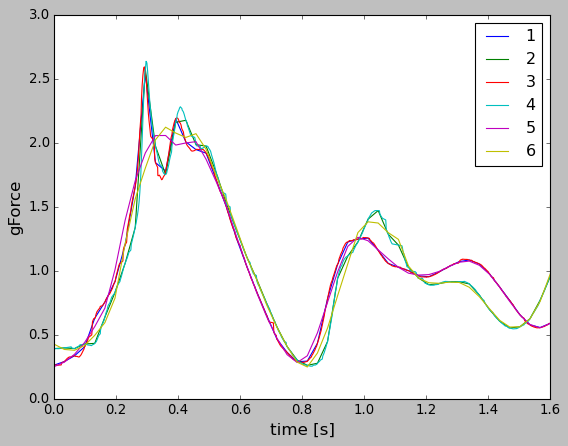

In [12]:
plt.plot(xvals,yinterp_1, label=1)
plt.plot(xvals,yinterp_2, label=2)
plt.plot(x1,y1, label=3)
plt.plot(x2,y2, label=4)
plt.plot(xvals,yinterp_3, label=5)
plt.plot(xvals,yinterp_4, label=6)

                                      
plt.xlabel('time [s]', fontsize=15)
plt.ylabel('gForce', fontsize=15)
plt.style.use('classic')
#plt.yscale("log")
plt.legend(loc='upper right')
plt.show()

In [13]:
def DTWDistance2(s1, s2,w=10):
    DTW={}
    w = max(w, abs(len(s1)-len(s2)))
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist = (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
    return np.sqrt(DTW[len(s1)-1, len(s2)-1])



ts1=df1_list[3]['TgF'].values
ts2=df3_list[6]['TgF'].values
ts3=df4_list[4]['TgF'].values
ts4=df2_list[7]['TgF'].values
print(DTWDistance2(ts1,ts2))
print(DTWDistance2(ts1,ts3))
print(DTWDistance2(ts2,ts3))
print(DTWDistance2(ts3,ts4))

22.503235056320232
22.579109792017938
0.8328355179745874
4.263913343397117


In [14]:
%%time

for i in range(100):
    DTWDistance2(yinterp_1,yinterp_2)

CPU times: total: 78.1 ms
Wall time: 286 ms


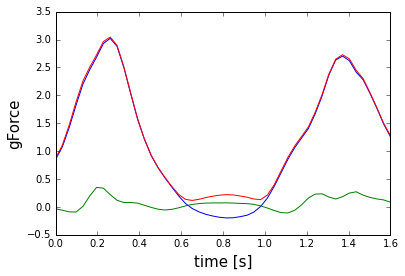

In [15]:
#df1_list=centroid_to_df_list(centroid_list_1,df1_list,jerk_data,span) #jerk
#df2_list=centroid_to_df_list(centroid_list_2,df2_list,jerk_data,span) #swing
#full_df= pd.concat(df1_list, ignore_index=True )
%matplotlib inline
sum_df = pd.DataFrame(columns=['rel_t', 'gFy', 'gFz'])
all_swings=df2_list+df3_list+df4_list

p_number=50
xvals = np.linspace(0, span, p_number)
#yinterp_1 = np.interp(xvals, x1, y1)
mean_swing_gFy=np.zeros(p_number)
mean_swing_gFz=np.zeros(p_number)
mean_swing_TgF=np.zeros(p_number)


for any_df in all_swings:
    #print(any_df['rel_t'].mean())
    #print(len(any_df['rel_t']))
    
    yinterp_1 = np.interp(xvals, any_df['rel_t'].values, any_df['gFy'].values)
    yinterp_2 = np.interp(xvals, any_df['rel_t'].values, any_df['gFz'].values)
    yinterp_3 = np.interp(xvals, any_df['rel_t'].values, any_df['TgF'].values)
    mean_swing_gFy=mean_swing_gFy+yinterp_1
    mean_swing_gFz=mean_swing_gFz+yinterp_2
    mean_swing_TgF=mean_swing_TgF+yinterp_3

mean_swing_gFy=mean_swing_gFy/len(all_swings)
mean_swing_gFz=mean_swing_gFz/len(all_swings)
mean_swing_TgF=mean_swing_TgF/len(all_swings)

plt.plot(xvals,mean_swing_gFy, label='gFy')
plt.plot(xvals,mean_swing_gFz, label='gFz')  
plt.plot(xvals,mean_swing_TgF, label='TgF') 
#plt.plot(mean_jerk['rel_t'],mean_jerk['TgF'], label='TgF')  
plt.xlabel('time [s]', fontsize=15)
plt.ylabel('gForce', fontsize=15)
plt.style.use('classic')
#plt.yscale("log")
#plt.legend(loc='upper right')
mean_swing_df = pd.DataFrame({'rel_t':xvals, 'gFy':mean_swing_gFy,'gFz':mean_swing_gFz, 'TgF': mean_swing_TgF })
name_to_write='ktbl'+'\\'+'mean_swing'+'.csv'
mean_swing_df.to_csv(name_to_write, index=False)

plt.show()

In [16]:
for any_df in all_swings:
    ts1=np.interp(xvals, any_df['rel_t'].values, any_df['gFy'].values)
    print(DTWDistance2(ts1,mean_swing_gFy))

1.213760007219782
0.6887811321483185
0.8333703247604367
0.912915888560016
0.8309200743773466
1.1492704775059408
0.9519306550606328
0.9979259305372519
0.8069345958362737
0.6984766106896099
0.9586258075033136
0.7002595757000747
0.9063408079784577
0.7457372284799183
0.6989525485607653
0.5694117539193302
0.583142355067543
0.7458208733454
0.9493158267904496
0.7589997048862195
0.7524554250537228
0.5337462699676238
0.6356554216913323
0.6824427554720702
0.7227236412998645
0.7361138295994326
0.6106553403719059
0.7068166273129541
0.6071109317892772
1.025405047205564


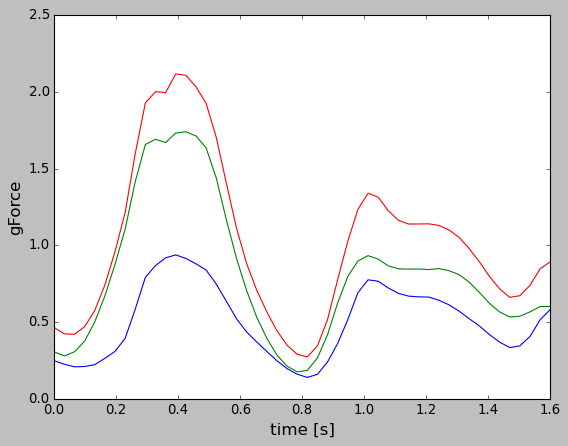

In [17]:
all_jerks=df1_list+df8_list+df9_list+df10_list+df11_list+df12_list

p_number=50
xvals = np.linspace(0, span, p_number)
#yinterp_1 = np.interp(xvals, x1, y1)
mean_jerk_gFy=np.zeros(p_number)
mean_jerk_gFz=np.zeros(p_number)
mean_jerk_TgF=np.zeros(p_number)

for any_df in all_jerks:
    #print(any_df['rel_t'].mean())
    #print(len(any_df['rel_t']))
    
    yinterp_1 = np.interp(xvals, any_df['rel_t'].values, any_df['gFy'].values)
    yinterp_2 = np.interp(xvals, any_df['rel_t'].values, any_df['gFz'].values)
    yinterp_3 = np.interp(xvals, any_df['rel_t'].values, any_df['TgF'].values)
    mean_jerk_gFy=mean_jerk_gFy+yinterp_1
    mean_jerk_gFz=mean_jerk_gFz+yinterp_2
    mean_jerk_TgF=mean_jerk_TgF+yinterp_3

mean_jerk_gFy=mean_jerk_gFy/len(all_jerks)
mean_jerk_gFz=mean_jerk_gFz/len(all_jerks)
mean_jerk_TgF=mean_jerk_TgF/len(all_jerks)

plt.plot(xvals,mean_jerk_gFy, label='gFy')
plt.plot(xvals,mean_jerk_gFz, label='gFz') 
plt.plot(xvals,mean_jerk_TgF, label='TgF') 
#plt.plot(mean_jerk['rel_t'],mean_jerk['TgF'], label='TgF')  
plt.xlabel('time [s]', fontsize=15)
plt.ylabel('gForce', fontsize=15)
plt.style.use('classic')
#plt.yscale("log")
#plt.legend(loc='upper right')

mean_jerk_df = pd.DataFrame({'rel_t':xvals, 'gFy':mean_jerk_gFy,'gFz':mean_jerk_gFz, 'TgF': mean_jerk_TgF })
name_to_write='ktbl'+'\\'+'mean_jerk'+'.csv'
mean_jerk_df.to_csv(name_to_write, index=False)


plt.show()

In [18]:
for any_df in all_jerks:
    ts1=np.interp(xvals, any_df['rel_t'].values, any_df['gFz'].values)
    ts2=np.interp(xvals, any_df['rel_t'].values, any_df['gFy'].values)
    ts3=np.interp(xvals, any_df['rel_t'].values, any_df['TgF'].values)
    #print(DTWDistance2(ts1,mean_swing_gFz))
    print(f' gFz {DTWDistance2(ts1,mean_jerk_gFz)} gFy {DTWDistance2(ts2,mean_jerk_gFy)} TgF {DTWDistance2(ts3,mean_jerk_TgF)} ')

 gFz 0.5941060194472755 gFy 0.7274615218950811 TgF 0.7576717614418093 
 gFz 0.8318639014099639 gFy 1.1665770282118262 TgF 0.8843849528052204 
 gFz 0.6867244713162163 gFy 0.9405631305648269 TgF 0.9109477548536893 
 gFz 0.9983058072631631 gFy 1.580677231389394 TgF 0.8002279702818492 
 gFz 1.0074743263015369 gFy 0.7991977920259818 TgF 0.8491395060987755 
 gFz 1.3469231536436843 gFy 1.436758892206799 TgF 0.8972064247127152 
 gFz 1.0829882432658064 gFy 0.914472931607393 TgF 0.9913230820695957 
 gFz 0.8468841055375045 gFy 1.1076392044718537 TgF 0.7740569234003218 
 gFz 1.071514812787865 gFy 0.643424926279082 TgF 0.9242169941027011 
 gFz 1.2282078916373815 gFy 1.1810384849739668 TgF 0.9025798085200064 
 gFz 1.1818362646339913 gFy 1.2036224075363722 TgF 1.178540183443732 
 gFz 0.8703607135505026 gFy 1.1263944562613926 TgF 1.0591559312209184 
 gFz 0.9150722670823694 gFy 1.2761618348113488 TgF 1.2132041328007463 
 gFz 1.0829919811604243 gFy 0.43717775826322747 TgF 0.922514460291984 
 gFz 1.11768

In [19]:
for any_df in all_jerks:
    ts1=np.interp(xvals, any_df['rel_t'].values, any_df['gFz'].values)
    ts2=np.interp(xvals, any_df['rel_t'].values, any_df['gFy'].values)
    ts3=np.interp(xvals, any_df['rel_t'].values, any_df['TgF'].values)
    #print(DTWDistance2(ts1,mean_swing_gFz))
    print(f' gFz {DTWDistance2(ts1,mean_swing_gFz)} gFy {DTWDistance2(ts2,mean_swing_gFy)} TgF {DTWDistance2(ts3,mean_swing_TgF)}' )

 gFz 4.995522821429064 gFy 6.938740032889795 TgF 3.7347791798980614
 gFz 5.548771217541858 gFy 8.222568624759072 TgF 4.582571424393557
 gFz 5.04874484998895 gFy 6.891738193251919 TgF 3.57614967569827
 gFz 6.237065700858958 gFy 9.293181274659219 TgF 4.396289835926406
 gFz 5.438240115600932 gFy 7.474758724995563 TgF 3.712519227057858
 gFz 6.026288396543876 gFy 8.319686657722654 TgF 4.593885999356336
 gFz 5.354608551935172 gFy 7.144490469079718 TgF 3.6627812236324315
 gFz 6.109440778001762 gFy 9.337413945858744 TgF 4.5438046077077
 gFz 5.271355475611272 gFy 7.528013572839184 TgF 3.813551175345242
 gFz 6.075802429811438 gFy 8.912967759010506 TgF 4.507894521552731
 gFz 5.395022361605972 gFy 6.951795213519694 TgF 3.699394002932964
 gFz 5.231778525639019 gFy 7.452008834223811 TgF 4.404520110449163
 gFz 4.997335299504927 gFy 5.783503412126334 TgF 3.7321946568616773
 gFz 5.530261086077017 gFy 7.744623284471372 TgF 4.332174653183718
 gFz 4.666351761815455 gFy 5.69202303301191 TgF 3.6341700519656

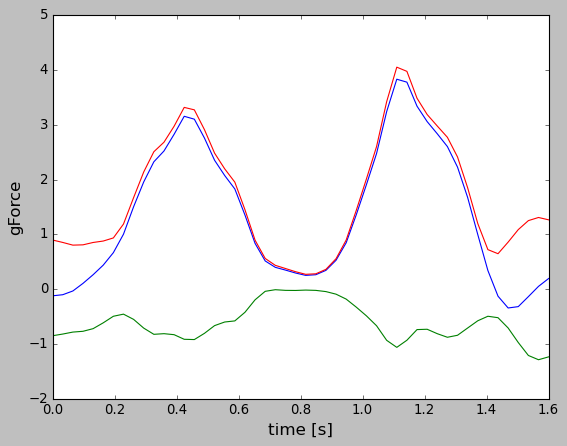

In [20]:
all_snatches=df5_list+df6_list+df7_list

p_number=50
xvals = np.linspace(0, span, p_number)
#yinterp_1 = np.interp(xvals, x1, y1)
mean_snatch_gFy=np.zeros(p_number)
mean_snatch_gFz=np.zeros(p_number)
mean_snatch_TgF=np.zeros(p_number)

for any_df in all_snatches:
    #print(any_df['rel_t'].mean())
    #print(len(any_df['rel_t']))
    
    yinterp_1 = np.interp(xvals, any_df['rel_t'].values, any_df['gFy'].values)
    yinterp_2 = np.interp(xvals, any_df['rel_t'].values, any_df['gFz'].values)
    yinterp_3 = np.interp(xvals, any_df['rel_t'].values, any_df['TgF'].values)
    mean_snatch_gFy=mean_snatch_gFy+yinterp_1
    mean_snatch_gFz=mean_snatch_gFz+yinterp_2
    mean_snatch_TgF=mean_snatch_TgF+yinterp_3

mean_snatch_gFy=mean_snatch_gFy/len(all_snatches)
mean_snatch_gFz=mean_snatch_gFz/len(all_snatches)
mean_snatch_TgF=mean_snatch_TgF/len(all_snatches)

plt.plot(xvals,mean_snatch_gFy, label='gFy')
plt.plot(xvals,mean_snatch_gFz, label='gFz')  
plt.plot(xvals,mean_snatch_TgF, label='TgF')  
#plt.plot(mean_jerk['rel_t'],mean_jerk['TgF'], label='TgF')  
plt.xlabel('time [s]', fontsize=15)
plt.ylabel('gForce', fontsize=15)
plt.style.use('classic')
#plt.yscale("log")
#plt.legend(loc='upper right')

mean_snatch_df = pd.DataFrame({'rel_t':xvals, 'gFy':mean_snatch_gFy,'gFz':mean_snatch_gFz, 'TgF': mean_snatch_TgF })
name_to_write='ktbl'+'\\'+'mean_snatch'+'.csv'
mean_snatch_df.to_csv(name_to_write, index=False)


plt.show()

In [21]:
for any_df in all_snatches:
    ts1=np.interp(xvals, any_df['rel_t'].values, any_df['gFz'].values)
    ts2=np.interp(xvals, any_df['rel_t'].values, any_df['gFy'].values)
    ts3=np.interp(xvals, any_df['rel_t'].values, any_df['TgF'].values)
    #print(DTWDistance2(ts1,mean_swing_gFz))
    print(f' gFz {DTWDistance2(ts1,mean_snatch_gFz)} gFy {DTWDistance2(ts2,mean_snatch_gFy)} TgF {DTWDistance2(ts3,mean_snatch_TgF)}')

 gFz 1.3826212482518656 gFy 1.6375119945638181 TgF 1.7130480281336187
 gFz 0.9842861741177712 gFy 0.9216107929618389 TgF 1.1854289022122024
 gFz 0.9294445826180151 gFy 1.2110033860397176 TgF 1.4892431453929478
 gFz 0.9959732769059305 gFy 1.0656723491692466 TgF 1.3920922929352375
 gFz 1.045779515628481 gFy 1.0454067827762403 TgF 1.491608500487578
 gFz 0.9605367804856403 gFy 1.2105280305874784 TgF 1.583503169466728
 gFz 0.8106140157261095 gFy 1.3423386861735276 TgF 1.5715221739119734
 gFz 0.9697880802845156 gFy 1.2191557509558624 TgF 1.586056294830042
 gFz 0.7103554801411578 gFy 1.2885687095170253 TgF 1.478566956253757
 gFz 0.9329047625631602 gFy 1.0017897535559266 TgF 1.3258901527702924
 gFz 1.0656181253993455 gFy 1.251010498434822 TgF 1.5880238344233673
 gFz 1.2914075346288694 gFy 1.3176227159483194 TgF 1.854004255756094
 gFz 1.1899088215065137 gFy 1.3043345881558144 TgF 1.7709086293943705
 gFz 0.8215482737279465 gFy 0.9523728785977857 TgF 1.372842880384448
 gFz 1.2499701813609305 gFy 

In [22]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def DTWDistance3(s1, s2,w=10):
    dtw_distance, warp_path = fastdtw(s1.reshape(-1, 1), s2.reshape(-1,1), dist=euclidean)
    return dtw_distance

for any_df in all_snatches:
    ts1=np.interp(xvals, any_df['rel_t'].values, any_df['gFz'].values)
    ts2=np.interp(xvals, any_df['rel_t'].values, any_df['gFy'].values)
    ts3=np.interp(xvals, any_df['rel_t'].values, any_df['TgF'].values)
    #print(DTWDistance2(ts1,mean_swing_gFz))
    print(f' gFz {DTWDistance3(ts1,mean_snatch_gFz)} gFy {DTWDistance3(ts2,mean_snatch_gFy)} TgF {DTWDistance3(ts3,mean_snatch_TgF)}')

 gFz 8.26214510456687 gFy 9.225948767515224 TgF 8.806614286190804
 gFz 5.759051020059397 gFy 5.530540755247312 TgF 6.778293166833597
 gFz 5.873492237984634 gFy 7.27956270311247 TgF 8.827286725234094
 gFz 5.782835479816845 gFy 6.440757334054666 TgF 8.341298358580891
 gFz 5.6973006395772785 gFy 5.844946843847864 TgF 8.592231110479855
 gFz 5.376303770584974 gFy 6.830463373639965 TgF 8.41332703654307
 gFz 4.612737393529154 gFy 7.370651488446621 TgF 8.772699446871572
 gFz 5.472252596479537 gFy 6.4897918884801395 TgF 8.789160938263127
 gFz 4.328970909825504 gFy 6.660376903674872 TgF 7.979484549498326
 gFz 5.327582162387894 gFy 5.826571367094877 TgF 7.520792067209934
 gFz 5.749100242671684 gFy 7.358304019143997 TgF 9.45080924643846
 gFz 6.7899062271279185 gFy 7.68949868475058 TgF 10.889447316523107
 gFz 5.750431731837875 gFy 7.858741648718879 TgF 10.397525306977071
 gFz 4.373748613982498 gFy 5.723855711289816 TgF 7.292002660463615
 gFz 6.472492017308035 gFy 6.475667382986177 TgF 9.79372930972

In [23]:
from dtaidistance import dtw

def DTWDistance4(s1, s2,w=10):
    dtw_distance = dtw.distance_fast(s1, s2)
    
    return dtw_distance

for any_df in all_snatches:
    ts1=np.interp(xvals, any_df['rel_t'].values, any_df['gFz'].values)
    ts2=np.interp(xvals, any_df['rel_t'].values, any_df['gFy'].values)
    ts3=np.interp(xvals, any_df['rel_t'].values, any_df['TgF'].values)
    #print(DTWDistance2(ts1,mean_swing_gFz))
    print(f' gFz {DTWDistance4(ts1,mean_snatch_gFz)} gFy {DTWDistance4(ts2,mean_snatch_gFy)} TgF {DTWDistance4(ts3,mean_snatch_TgF)}')

 gFz 1.3826212482518656 gFy 1.6375119945638181 TgF 1.7130480281336187
 gFz 0.9842861741177712 gFy 0.9216107929618389 TgF 1.1854289022122024
 gFz 0.9294445826180151 gFy 1.2110033860397176 TgF 1.4892431453929478
 gFz 0.9959732769059305 gFy 1.0656723491692466 TgF 1.3920922929352375
 gFz 1.045779515628481 gFy 1.0454067827762403 TgF 1.491608500487578
 gFz 0.9605367804856403 gFy 1.2105280305874784 TgF 1.583503169466728
 gFz 0.8106140157261095 gFy 1.3423386861735276 TgF 1.5715221739119734
 gFz 0.9697880802845156 gFy 1.2191557509558624 TgF 1.586056294830042
 gFz 0.7103554801411578 gFy 1.2885687095170253 TgF 1.478566956253757
 gFz 0.9329047625631602 gFy 1.0017897535559266 TgF 1.3258901527702924
 gFz 1.0656181253993455 gFy 1.251010498434822 TgF 1.5880238344233673
 gFz 1.2914075346288694 gFy 1.3176227159483194 TgF 1.854004255756094
 gFz 1.1899088215065137 gFy 1.3043345881558144 TgF 1.7709086293943705
 gFz 0.8215482737279465 gFy 0.9523728785977857 TgF 1.372842880384448
 gFz 1.2499701813609305 gFy 

<IPython.core.display.Javascript object>


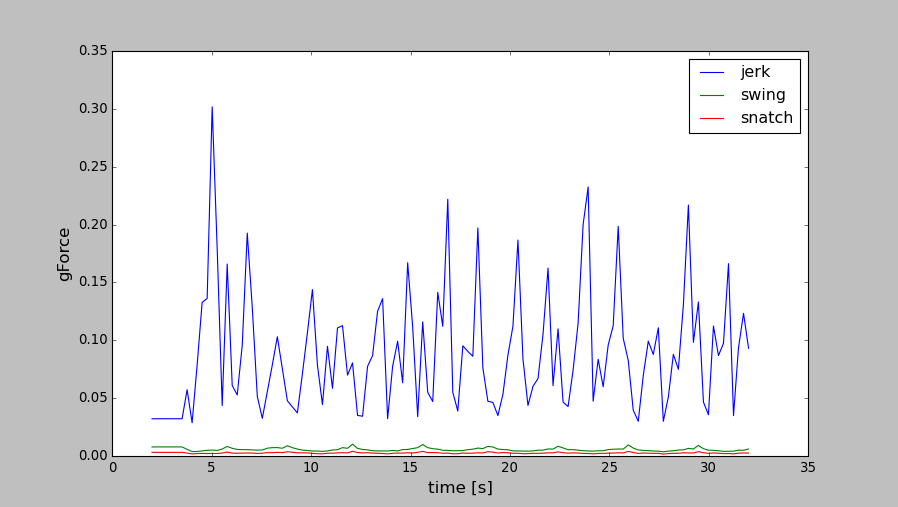

In [37]:
#plot_data=ktbl_4[(ktbl_4['rel_t']>12)  & (ktbl_4['rel_t']< 34) ]
%matplotlib notebook

t_start=2
t_stop=32
t_steps=np.linspace(t_start,t_stop, num=(t_stop-t_start)*4)
jerk_dist=np.empty(len(t_steps))
swing_dist=np.empty(len(t_steps))
snatch_dist=np.empty(len(t_steps))
xvals = np.linspace(0, span, p_number)
test_df=ktbl_6
#test_df=pd.read_csv('20240522-001955_swing.csv', names=['time', 'gFx', 'gFy', 'gFz', 'TgF'])

#test_df=pd.read_csv('20240522-002602_snatch.csv', names=['time', 'gFx', 'gFy', 'gFz', 'TgF'])

test_df=pd.read_csv('20240522-002323_jerk.csv', names=['time', 'gFx', 'gFy', 'gFz', 'TgF'])

for idx,timestep in enumerate(t_steps):
    test_ts=test_df[(test_df['time']>timestep-span)  & (test_df['time']< timestep+span) ]
    #print(test_ts['rel_t'].values[0])
    start_time=test_ts['time'].values[0]
    sliding_rel_time=test_ts['time'].values-start_time
    sliding_gFy = np.interp(xvals, sliding_rel_time, test_ts['gFy'].values)
    sliding_gFz = np.interp(xvals, sliding_rel_time, test_ts['gFz'].values)
    sliding_TgF = np.interp(xvals, sliding_rel_time, test_ts['TgF'].values)
    #jerk_dist[idx]=(DTWDistance2(sliding_gFy,mean_jerk_gFy)**2+DTWDistance2(sliding_gFz,mean_jerk_gFz)**2)**0.5
    #swing_dist[idx]=(DTWDistance2(sliding_gFy,mean_swing_gFy)**2+DTWDistance2(sliding_gFz,mean_swing_gFz)**2)**0.5
    #snatch_dist[idx]=(DTWDistance2(sliding_gFy,mean_snatch_gFy)**2+DTWDistance2(sliding_gFz,mean_snatch_gFz)**2)**0.5
    jerk_dist[idx]=DTWDistance4(sliding_gFy,mean_jerk_gFy)+DTWDistance4(sliding_gFz,mean_jerk_gFz)
    swing_dist[idx]=DTWDistance4(sliding_gFy,mean_swing_gFy)+DTWDistance4(sliding_gFz,mean_swing_gFz)
    snatch_dist[idx]=DTWDistance4(sliding_gFy,mean_snatch_gFy)+DTWDistance4(sliding_gFz,mean_snatch_gFz)
    
    #jerk_dist[idx]=DTWDistance3(sliding_gFy,mean_jerk_gFy)+DTWDistance3(sliding_gFz,mean_jerk_gFz)
    #swing_dist[idx]=DTWDistance3(sliding_gFy,mean_swing_gFy)+DTWDistance3(sliding_gFz,mean_swing_gFz)
    #snatch_dist[idx]=DTWDistance3(sliding_gFy,mean_snatch_gFy)+DTWDistance3(sliding_gFz,mean_snatch_gFz)
a=0.1    
plt.plot(t_steps,1/((jerk_dist)**2+a), label='jerk')
plt.plot(t_steps,1/((swing_dist)**2+a), label='swing')  
plt.plot(t_steps,1/((snatch_dist)**2+a), label='snatch')  
#plt.plot(mean_jerk['rel_t'],mean_jerk['TgF'], label='TgF')  
plt.xlabel('time [s]', fontsize=15)
plt.ylabel('gForce', fontsize=15)
plt.style.use('classic')
#plt.yscale("log")
plt.legend(loc='upper right')
plt.show()

In [23]:
k=5
reg_data=all_swings[0:5]+all_jerks[0:5]+all_snatches[0:5]
labels=['swing', 'swing', 'swing','swing', 'swing', 'jerk', 'jerk', 'jerk', 'jerk', 'jerk', 'snatch', 'snatch', 'snatch', 'snatch', 'snatch']
for idx,any_df in enumerate(reg_data):
    any_df.attr={'label':labels[idx]}
    
#for idx,any_df in enumerate(reg_data):
    #print(any_df.attr['label'])
# 25 - jerk
# 61.47 - swing
# 14.4 - none
timestamp=25.1
test_ts=ktbl_1[(ktbl_1['rel_t']>timestamp-span)  & (ktbl_1['rel_t']< timestamp+span) ]
request_df=test_ts

#request_df=all_swings[9]

#xvals = np.linspace(0, span, p_number)

def resample_df(span, p_number, input_df):
    xvals = np.linspace(0, span, p_number)
    start_time=input_df['rel_t'].values[0]
    sliding_rel_time=input_df['rel_t'].values-start_time
    resampled_gFy = np.interp(xvals, sliding_rel_time, input_df['gFy'].values)
    resampled_gFz = np.interp(xvals, sliding_rel_time, input_df['gFz'].values)
    resampled_TgF = np.interp(xvals, sliding_rel_time, input_df['TgF'].values)
    
    return (resampled_gFy,resampled_gFz, resampled_TgF)

def knn_DTW(data, query, k):
    resampled_query=resample_df(span, p_number, query)
    dist_labels=pd.DataFrame(columns=['label', 'distance'])
    
    for any_df in data:
        resampled_item=resample_df(span, p_number, any_df)
        current_label=any_df.attr['label']
        current_distance=(DTWDistance2(resampled_item[0],resampled_query[0])**2+DTWDistance2(resampled_item[1],resampled_query[1])**2)**0.5
        #current_distance=DTWDistance2(resampled_item[2],resampled_query[2])
        dist_labels.loc[len(dist_labels)] = [current_label,current_distance]
    dist_labels_sorted=dist_labels.sort_values(by=['distance'])
    print (dist_labels_sorted[0:k])
    print(dist_labels_sorted[0:k]['label'].mode())
    return 0

return_value=knn_DTW(reg_data, request_df, k)

C:\Users\Andrey\AppData\Local\Temp\ipykernel_21516\2203320188.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  any_df.attr={'label':labels[idx]}


  label  distance
5  jerk  3.524462
6  jerk  3.665532
7  jerk  3.980433
9  jerk  4.138590
8  jerk  4.275208
0    jerk
Name: label, dtype: object
